In [349]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [350]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

In [351]:
print(len(df))

1491


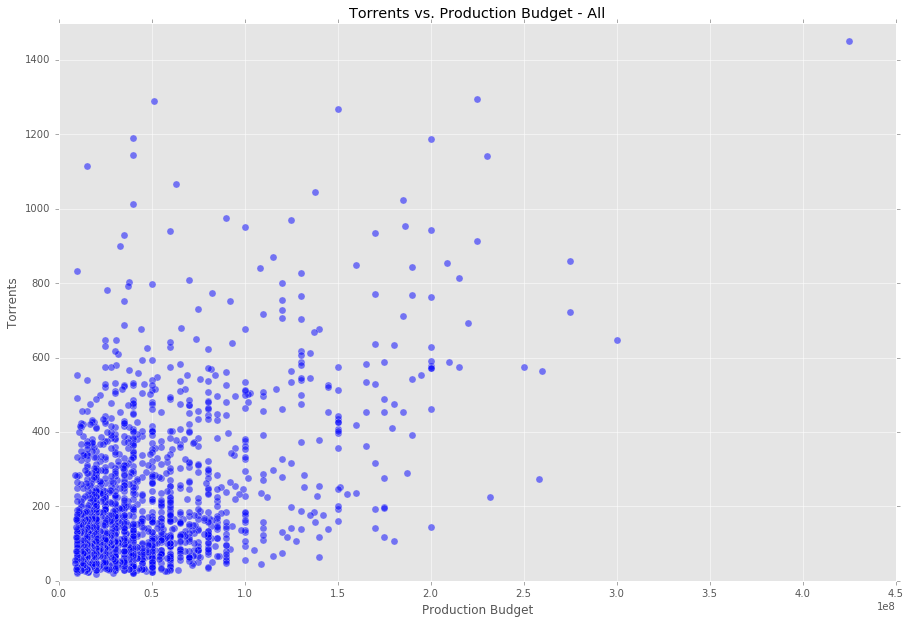

In [355]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df['Prod_Budget'], df['Total_Torrents'], alpha=0.5, s=50)

In [356]:
# unique list of grouped genres
unq_genres = df['Genre'].unique()
unq_genres = unq_genres.tolist()

# unique list of individual genres
ind_genre = set()

for lst in unq_genres:
    for genre in lst.split(','):
        ind_genre.add(genre.strip())
ind_genre = sorted(ind_genre)

print(ind_genre)

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [357]:
# dictionary - count of genre occurences
count = defaultdict(lambda:0)

for genre in ind_genre:
    count[genre] = df.Genre.str.contains(genre).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
print(srt)

[('Drama', 612), ('Comedy', 566), ('Action', 518), ('Adventure', 345), ('Crime', 328), ('Thriller', 296), ('Romance', 232), ('Horror', 161), ('Sci-Fi', 159), ('Mystery', 151), ('Fantasy', 143), ('Family', 121), ('Biography', 66), ('Animation', 63), ('Sport', 51), ('Music', 45), ('History', 31), ('War', 23), ('Western', 13), ('Musical', 9)]


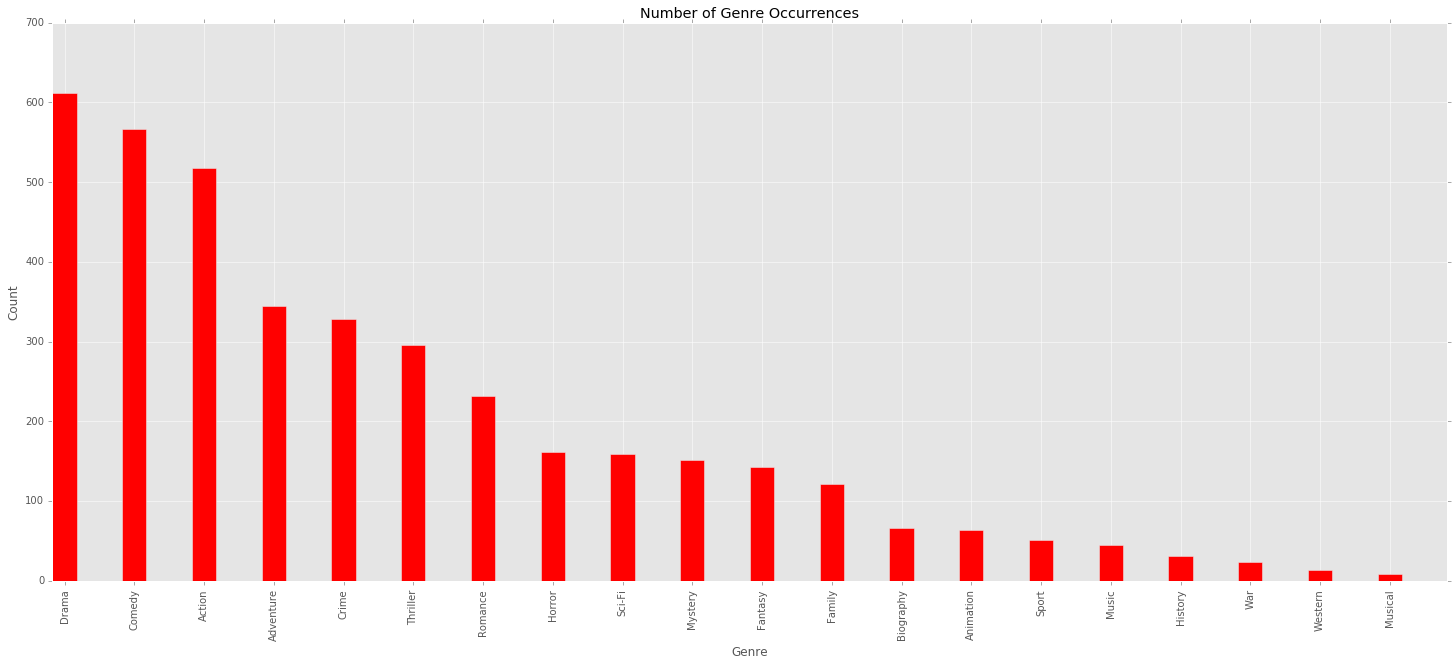

In [358]:
plt.figure(figsize=(25,10))

ind = np.arange(len(count)) # the x locations for the groups
width = 0.35 # the width of the bars

bar_genre = [genre for genre, count in srt]
bar_count = [count for genre, count in srt]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Number of Genre Occurrences')
plt.xticks(ind + width/2., (bar_genre), rotation='vertical')
plt.yticks(np.arange(0, 701, 100))

plt.show()



In [359]:
# return tuple of (string, list)
tup_lst = []
for genre_gp in unq_genres:
    temp = []
    for genre in genre_gp.split():
        temp.append(genre)
    tup_lst.append((genre_gp, temp))

In [360]:
def srch_lst(term, t_lst):
    srch = []
    for st, lst in t_lst:
        if term in st:
            srch.append(st)
    return srch
# print(srch_lst('Comedy', tup_lst))

612


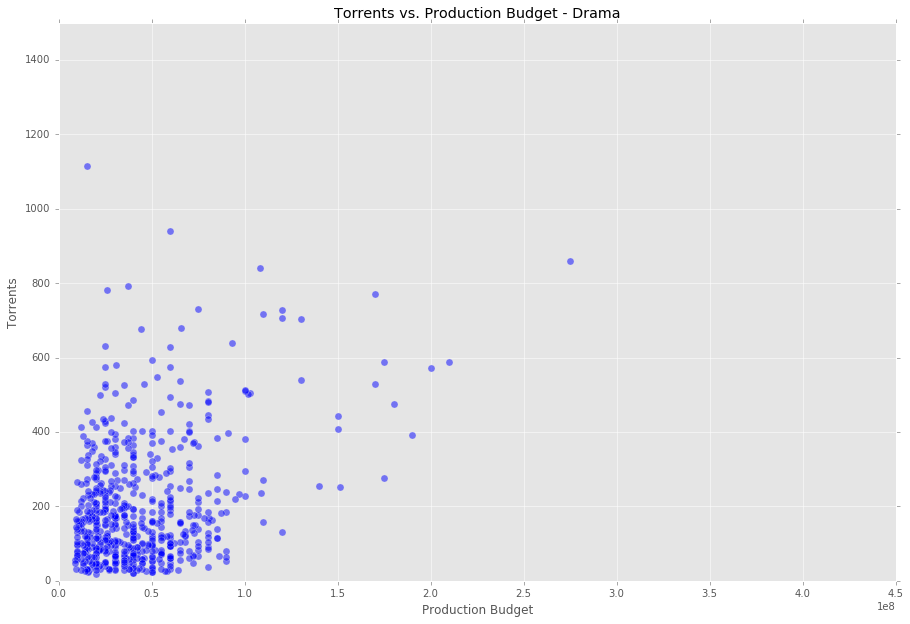

In [361]:
term = 'Drama'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

566


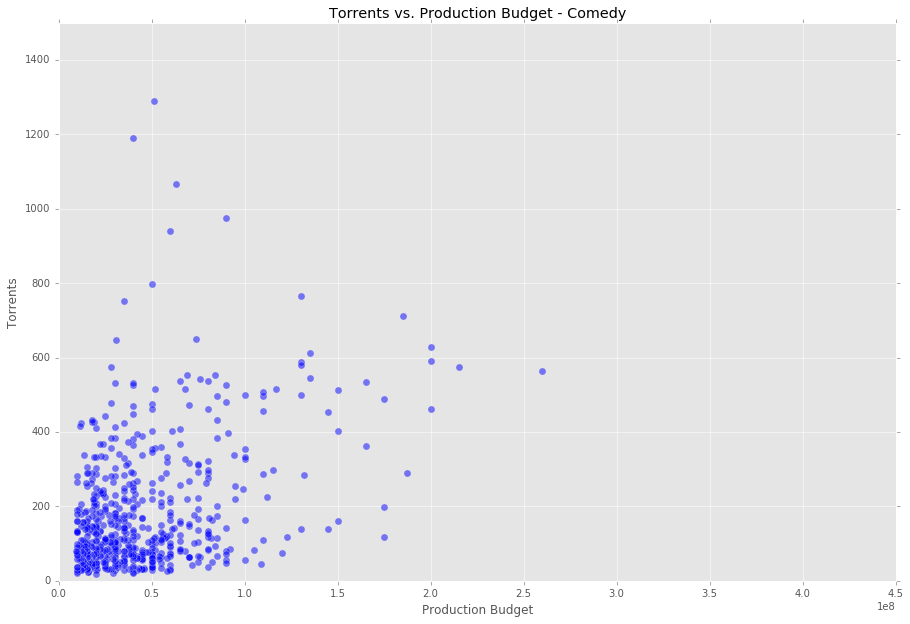

In [362]:
term = 'Comedy'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

518


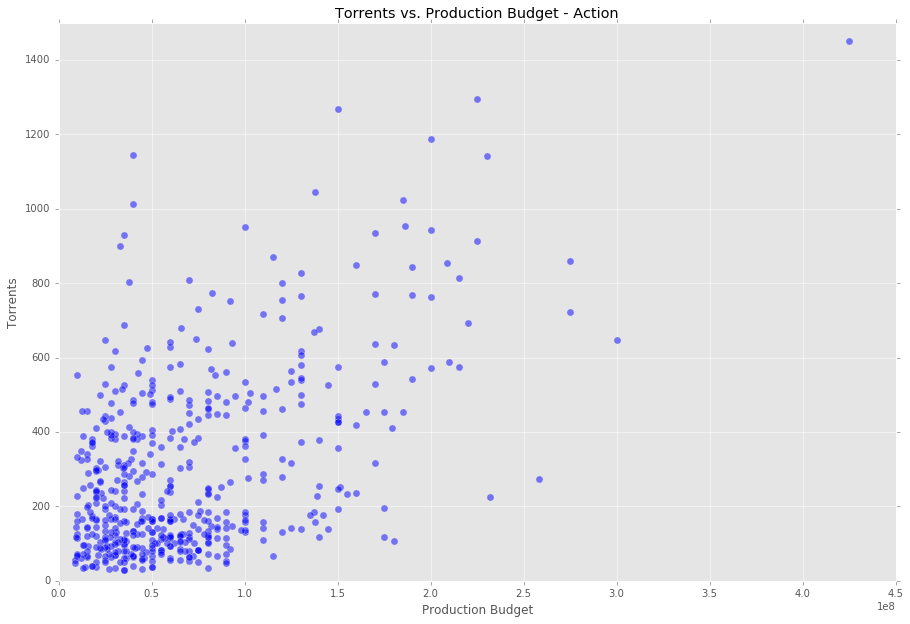

In [363]:
term = 'Action'
df_a = df.loc[df['Genre'].isin(srch_lst(term, tup_lst))]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [364]:
df['Genre'].value_counts()

Comedy                          68
Comedy, Romance                 67
Action, Crime, Drama            58
Comedy, Drama, Romance          49
Action, Comedy, Crime           40
Action, Adventure, Sci-Fi       40
Crime, Drama, Thriller          40
Action, Crime, Thriller         38
Animation, Adventure, Comedy    32
Action, Adventure, Comedy       29
Drama, Romance                  29
Action, Adventure, Drama        24
Action, Adventure, Fantasy      23
Action, Adventure, Thriller     23
Crime, Drama, Mystery           23
Comedy, Drama                   21
Horror, Mystery, Thriller       18
Horror, Mystery                 18
Action, Drama, Thriller         17
Comedy, Crime                   17
Drama                           17
Adventure, Comedy, Family       16
Horror                          16
Comedy, Family, Fantasy         15
Comedy, Drama, Family           14
Comedy, Family                  14
Biography, Drama, History       13
Adventure, Family, Fantasy      13
Crime, Thriller     

In [369]:
pd.set_option('display.mpl_style', 'default')               # Produces pretty plots!
plt.rcParams['figure.figsize'] = (8, 8)

df_sub = df[['Prod_Budget', 'Director', 'Total_Torrents']]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2869: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [371]:
df_sub.describe()

,Prod_Budget,Total_Torrents
count,1.491000e+03,1491.00000
mean,5.231981e+07,231.88397
std,4.425394e+07,201.28225
min,9.000000e+06,17.00000
25%,2.200000e+07,91.50000
50%,4.000000e+07,165.00000
75%,6.500000e+07,311.50000
max,4.250000e+08,1450.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a73d390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11093c438>]], dtype=object)

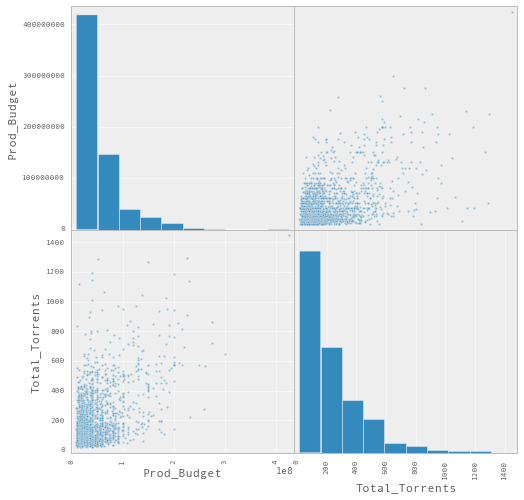

In [372]:
# Lets take a look at our entire model
pd.tools.plotting.scatter_matrix(df_sub)

In [384]:
from patsy import dmatrices

y, x = dmatrices('Total_Torrents ~ Prod_Budget + Director', data=df_sub, return_type='dataframe')

In [385]:
y.head()

,Total_Torrents
0,1450.0
1,647.0
2,861.0
3,723.0
4,563.0


In [386]:
x.head()

,Intercept,Director[T.Adam Shankman],Director[T.Adrian Lyne],Director[T.Akiva Goldsman],Director[T.Akiva Schaffer],Director[T.Alan J. Pakula],Director[T.Alan Parker],Director[T.Alan Poul],"Director[T.Albert Hughes, Allen Hughes]",Director[T.Alejandro Agresti],...,Director[T.Willard Huyck],Director[T.William A. Fraker],Director[T.William Brent Bell],Director[T.William Friedkin],Director[T.William Malone],Director[T.William Phillips],Director[T.Wolfgang Petersen],Director[T.Woody Allen],Director[T.Zack Snyder],Prod_Budget
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,425000000.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300000000.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275000000.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275000000.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260000000.0


In [402]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()

#results.summary()

In [397]:
import statsmodels.formula.api as smf

results = smf.ols(formula='Total_Torrents ~ Prod_Budget + Director', data=df_sub,).fit()

#results.summary()

In [391]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [393]:
model.score(x, y)

0.69334612682263175

In [395]:
#model.coef_

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116c930f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124d4f5c0>]], dtype=object)

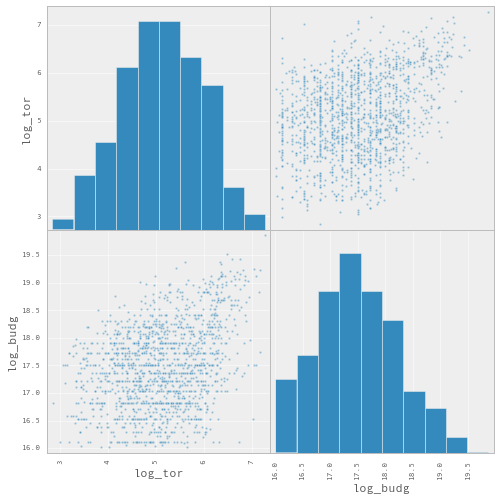

In [396]:
data.yr=data.yr.replace({0:.25})

df_sub['log_tor']=np.log(df_sub.Total_Torrents)
df_sub['log_budg']=np.log(df_sub.Prod_Budget)

trans=df_sub[['log_tor','log_budg']]
pd.tools.plotting.scatter_matrix(trans)

In [400]:
y, x = dmatrices('log_tor ~ log_budg + Director', data=df_sub, return_type='dataframe')
x.head()

,Intercept,Director[T.Adam Shankman],Director[T.Adrian Lyne],Director[T.Akiva Goldsman],Director[T.Akiva Schaffer],Director[T.Alan J. Pakula],Director[T.Alan Parker],Director[T.Alan Poul],"Director[T.Albert Hughes, Allen Hughes]",Director[T.Alejandro Agresti],...,Director[T.Willard Huyck],Director[T.William A. Fraker],Director[T.William Brent Bell],Director[T.William Friedkin],Director[T.William Malone],Director[T.William Phillips],Director[T.Wolfgang Petersen],Director[T.Woody Allen],Director[T.Zack Snyder],log_budg
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.867600
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.519293
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.432282
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.432282
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.376192


In [401]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

model.score(x,y)

0.71446607543146812

In [404]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.333,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

In [406]:
sum_squares_regr= np.sum((model.predict(x_train) -np.mean(y_train))**2)
# estimated value of y - y_mean
total_sum_squares=np.sum((y_train-np.mean(y_train))**2)
r_squared = sum_squares_regr / total_sum_squares

print(sum_squares_regr)
print(total_sum_squares)
print(r_squared)

Exception: Data must be 1-dimensional

In [407]:
metrics.mean_squared_error(y_train,model.predict(x_train))

0.16839191727503885

In [408]:
#model.score(x_train, y_train)
metrics.mean_squared_error(y_test,model.predict(x_test))

9.718940830071387e+23

In [410]:
from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=5)

In [412]:
for train_index, test_index in kf:
    #X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ## Fit on Train! 
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])
    # Score on Test! 
    #print(clf2.coef_, metrics.mean_squared_error(y.iloc[test_index], clf2.predict(x.iloc[test_index])))